# Embedding Images

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [10]:
def extract(file, iterator):
  iterator.set_postfix_str(file)
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  #display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...], verbose=0)
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

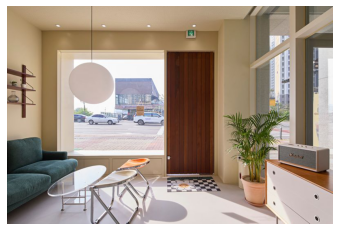

In [19]:
sample_path = '/content/sample.png'
img = Image.open(sample_path)
plt.imshow(img)
plt.axis(False)
plt.show()

In [20]:
sample_feature = extract(sample_path)
print(min(sample_feature), max(sample_feature))
len(sample_feature)

1/1 [==============================] - 0s 67ms/step
0.0 3.789486


1280

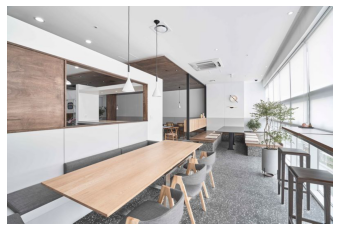

In [23]:
sample1_path = '/content/sample_1.png'
img = Image.open(sample1_path)
plt.imshow(img)
plt.axis(False)
plt.show()

In [24]:
sample1_feature = extract(sample1_path)
print(min(sample1_feature), max(sample1_feature))
len(sample1_feature)

1/1 [==============================] - 0s 57ms/step
0.0 3.6371422


1280

# Distances Images

In [4]:
from scipy.spatial import distance

In [5]:
metric = 'cosine'

In [27]:
# same image
dc = distance.cdist([sample_feature], [sample_feature], metric)[0]
print(dc)
print("the distance between cat1 and the cat1 is {}".format(dc))

[0.]
the distance between cat1 and the cat1 is [0.]


In [29]:
# different image
dc = distance.cdist([sample_feature], [sample1_feature], metric)[0]
print(dc)

[0.44113398]


# Train dataset to feature Embedding vector

In [6]:
import os
from glob import glob
import pickle
from tqdm import tqdm

In [7]:
styles = os.listdir('./rsc')
styles

['vintage', 'modern', 'minimal', 'casual', 'whitewood']

In [12]:
emb = [None]*len(styles)
with tqdm(enumerate(styles), total=len(styles)) as iterator:
    for idx, style in iterator:
        imgs_path = sorted(glob(os.path.join('./rsc', style, '*.png')))
        emb[idx] = [tuple((img_path.split('/')[3], extract(img_path, iterator))) for img_path in imgs_path]

100%|██████████| 5/5 [1:06:24<00:00, 796.86s/it, ./rsc/whitewood/희릿27.png]                            


In [13]:
emb = np.array(emb)
emb.shape

/tmp/ipykernel_948600/1678161535.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  emb = np.array(emb)


(5,)

In [15]:
emb[0][0]

(' (슈터바 육일이이사)00.png',
 array([0.9676235 , 0.        , 0.        , ..., 0.        , 0.00376591,
        0.06327935], dtype=float32))

In [14]:
with open('./embs.pkl', 'wb') as f:
    pickle.dump(emb, f)